In [1]:
## imports
import pandas as pd
import numpy as np
from scipy.optimize import minimize ## if not installed, use conda install -c anaconda scipy
import matplotlib.pyplot as plt
import scipy.io 
import math

In [2]:
# angles are rad and they can be negative
def cold_ang_mag(x1,y1,x2,y2):
    r = abs( np.sqrt( np.power(y2-y1,2) + np.power(x2-x1,2) ) )  
    if(x2-x1 == 0):
        theta = (y2-y1)/(abs(y2-y1))*np.pi/2 
    elif(x2-x1 <0):
        theta = (math.atan((y2-y1)/(x2-x1)) + np.pi) 
    else:
        theta = math.atan((y2-y1)/(x2-x1)) 
    if(theta < 0):
        theta = theta + 2*np.pi 
    if(theta*180/np.pi  > 180.0):
        theta = theta -2*np.pi
    #theta = theta*180/np.pi            #to see the decimal angle
    return r,theta

In [32]:
def distribution(arr): # arr: the array containing dominant points
    distrib =[]          
    for i in range(len(arr)-1):
        distrib.append(cold_ang_mag(arr[i][0],arr[i][1],arr[i+1][0],arr[i+1][1]))
    return distrib      # array of the r and theta for the lines (size less by one to number of points)
    

In [38]:
# test
arr =np.array ([[1,2],[-2,2],[-3,-4],[1,-6]])
dist = np.array(distribution(arr))
print(dist)

[[ 3.          3.14159265]
 [ 6.08276253 -1.735945  ]
 [ 4.47213595 -0.46364761]]


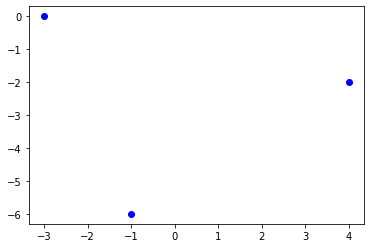

In [48]:
# spatial r&theta
def spatial_convert(dist):
    spatial =  np.empty(dist.shape,float)
    for i in range(len(dist)):
        spatial[i,0] = dist[i,0]*np.cos(dist[i,1])
        spatial[i,1] = dist[i,0]*np.sin(dist[i,1])
    return spatial

#test
plt.cla()
sp = spatial_convert(dist)
plt.plot(sp[:, 0], sp[:, 1], 'bo')
plt.show()
